## Import Packages

In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import exchange_calendars as xc

## Inspect Data

In [2]:
# Define raw file path
raw_path = Path("../../../01_Data_Raw/01_Carbon_Markets/GDEA_raw.csv")

# Load CSV
df_raw = pd.read_csv(
    raw_path,
    header = 0,
    encoding = "gb18030"
)

In [3]:
df_raw.head()


指标名称 广东:收盘价:碳排放权配额(GDEA) 广东:成交均价:碳排放权配额(GDEA) 广东:当日成交量:碳排放权配额(GDEA)  \
0        频率                   日                    日                     日   
1        单位                 元/吨                  元/吨                     吨   
2      指标ID            S6301317             S6301318              S6301319   
3        来源           广州碳排放权交易所            广州碳排放权交易所             广州碳排放权交易所   
4  2025/5/6               38.02                38.02                   933   

  广东:当日成交额:碳排放权配额(GDEA) 广东:当日成交额:碳排放权配额(GDEA).1 广东:累计成交额:碳排放权配额(GDEA)  
0                     日                       日                     日  
1                     元                       元                     元  
2              S6301320                S6301320              S6301322  
3             广州碳排放权交易所               广州碳排放权交易所             广州碳排放权交易所  
4               35472.6                 35472.6       5.77157259664E9

In [4]:
df_raw.tail(4)

指标名称 广东:收盘价:碳排放权配额(GDEA) 广东:成交均价:碳排放权配额(GDEA)  \
4159  2013/12/20                  60                   60   
4160  2013/12/19               60.17            60.166626   
4161         NaN                 NaN                  NaN   
4162   数据来源：Wind                 NaN                  NaN   

     广东:当日成交量:碳排放权配额(GDEA) 广东:当日成交额:碳排放权配额(GDEA) 广东:当日成交额:碳排放权配额(GDEA).1  \
4159                   100                  6000                    6000   
4160                120029               7221740                 7221740   
4161                   NaN                   NaN                     NaN   
4162                   NaN                   NaN                     NaN   

     广东:累计成交额:碳排放权配额(GDEA)  
4159                   NaN  
4160                   NaN  
4161                   NaN  
4162                   NaN

In [5]:
# Inspect shape and columns
print(f"Shape: {df_raw.shape}")
print("Column list with indices:")
for idx, col in enumerate(df_raw.columns):
    print(f"{idx}: {col}")

# Summary of dtypes and non-null counts
print("\nInfo:")
print(df_raw.info())

# Missing values per column
print("\nMissing values per column:")
print(df_raw.isnull().sum())

# Check unique dates
date_col = df_raw.columns[0]
print(f"\nUnique dates in {date_col}:")
print(df_raw[date_col].unique())

Shape: (4163, 7)
Column list with indices:
0: 指标名称
1: 广东:收盘价:碳排放权配额(GDEA)
2: 广东:成交均价:碳排放权配额(GDEA)
3: 广东:当日成交量:碳排放权配额(GDEA)
4: 广东:当日成交额:碳排放权配额(GDEA)
5: 广东:当日成交额:碳排放权配额(GDEA).1
6: 广东:累计成交额:碳排放权配额(GDEA)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   指标名称                     4162 non-null   object
 1   广东:收盘价:碳排放权配额(GDEA)      2479 non-null   object
 2   广东:成交均价:碳排放权配额(GDEA)     2481 non-null   object
 3   广东:当日成交量:碳排放权配额(GDEA)    2481 non-null   object
 4   广东:当日成交额:碳排放权配额(GDEA)    2481 non-null   object
 5   广东:当日成交额:碳排放权配额(GDEA).1  2481 non-null   object
 6   广东:累计成交额:碳排放权配额(GDEA)    3143 non-null   object
dtypes: object(7)
memory usage: 227.8+ KB
None

Missing values per column:
指标名称                          1
广东:收盘价:碳排放权配额(GDEA)        1684
广东:成交均价:碳排放权配额(GDEA)       1682
广东:当日成交量:碳排放权配额(GDEA)      1682
广东:当日成交

## Make Data Structure Clean
Remove Meta Data, drop duplicate column, rename columns

In [6]:
# Drop first 4 rows, last 2 footer rows
df = df_raw.iloc[4:-2]

In [7]:
df = df.copy()

# Drop the duplicate column by name (instead of by index) and without inplace
dup_col = df.columns[5]
df = df.drop(columns=[dup_col])

# Rename columns using a mapping dict
col_map = {
    df.columns[0]: "date",
    df.columns[1]: "close",
    df.columns[2]: "vwap",
    df.columns[3]: "volume_tons",
    df.columns[4]: "turnover_cny",
    df.columns[5]: "cum_turnover_cny"
}
df = df.rename(columns=col_map)

# Sort by date
df = df.sort_values(by="date", ascending=True)

# Verify
df.head(10)


date  close       vwap volume_tons turnover_cny cum_turnover_cny
4160  2013/12/19  60.17  60.166626      120029      7221740              NaN
4159  2013/12/20     60         60         100         6000              NaN
4158  2013/12/21    NaN        NaN         NaN          NaN              NaN
4157  2013/12/22    NaN        NaN         NaN          NaN              NaN
4156  2013/12/23    NaN        NaN         NaN          NaN          7227740
4155  2013/12/24    NaN        NaN         NaN          NaN          7227740
4154  2013/12/25    NaN        NaN         NaN          NaN          7227740
4153  2013/12/26    NaN        NaN         NaN          NaN          7227740
4152  2013/12/27    NaN        NaN         NaN          NaN          7227740
4151  2013/12/28    NaN        NaN         NaN          NaN              NaN

In [8]:
df.dtypes

date                object
close               object
vwap                object
volume_tons         object
turnover_cny        object
cum_turnover_cny    object
dtype: object

## Parsing Data Types

In [9]:
# `date` column to datetime
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")

# all other to numeric
numeric_cols = [
    "close",
    "vwap",
    "volume_tons",
    "turnover_cny",
    "cum_turnover_cny"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Set `date` as index
df = df.set_index("date").sort_index(ascending=True)

df.head(10)

close       vwap  volume_tons  turnover_cny  cum_turnover_cny
date                                                                     
2013-12-19  60.17  60.166626     120029.0     7221740.0               NaN
2013-12-20  60.00  60.000000        100.0        6000.0               NaN
2013-12-21    NaN        NaN          NaN           NaN               NaN
2013-12-22    NaN        NaN          NaN           NaN               NaN
2013-12-23    NaN        NaN          NaN           NaN         7227740.0
2013-12-24    NaN        NaN          NaN           NaN         7227740.0
2013-12-25    NaN        NaN          NaN           NaN         7227740.0
2013-12-26    NaN        NaN          NaN           NaN         7227740.0
2013-12-27    NaN        NaN          NaN           NaN         7227740.0
2013-12-28    NaN        NaN          NaN           NaN               NaN

### Temporary Data Storage
Temporary save to current directory in case of unexpected errors

In [10]:
# Print the current working directory
print("Current working directory:", os.getcwd())
# save to parquet
df.to_parquet("../_temp_data_files/01_GDEA_Interim1.parquet")

Current working directory: /Users/siruizhang/Desktop/碳交易/Project/03_Code/01_Data_Cleaning/01_Carbon_Markets


In [11]:
# Restore from parquet
df_restored = pd.read_parquet("../_temp_data_files/01_GDEA_Interim1.parquet")
df_restored.head(10)

close       vwap  volume_tons  turnover_cny  cum_turnover_cny
date                                                                     
2013-12-19  60.17  60.166626     120029.0     7221740.0               NaN
2013-12-20  60.00  60.000000        100.0        6000.0               NaN
2013-12-21    NaN        NaN          NaN           NaN               NaN
2013-12-22    NaN        NaN          NaN           NaN               NaN
2013-12-23    NaN        NaN          NaN           NaN         7227740.0
2013-12-24    NaN        NaN          NaN           NaN         7227740.0
2013-12-25    NaN        NaN          NaN           NaN         7227740.0
2013-12-26    NaN        NaN          NaN           NaN         7227740.0
2013-12-27    NaN        NaN          NaN           NaN         7227740.0
2013-12-28    NaN        NaN          NaN           NaN               NaN

## Further Inspection on Data Quality

### Remove Pre-mature phase via rolling trade frequency

Use a 60-day rolling trade frequency to decide the mature start date
We take the first time when the 60-day rolling trade frequency is greater than 50% as the mature start date

The smoothed 60-day rolling trade frequency is calculated by a 20-day moving average of the 60-day rolling trade frequency
For plotting purposes only

In [12]:
# Ensure df_sorted exists and is indexed by DatetimeIndex

# binary flag: 1 if any volume on that calendar day
trade_flag = (
    df["volume_tons"].notna()   # True where at least one trade
    .astype(int)
)

# 60-day rolling trade frequency, plus a 20-day smoothing
rolling60 = trade_flag.rolling(60, min_periods=60).mean()
rolling60_smth = rolling60.rolling(20, min_periods=1).mean()  # extra smoothing

# detect first date where freq ≥ 50 %
mature_start = rolling60[rolling60 >= 0.50].index.min()

# window limits for zoom plot (first 3 calendar-years after launch)
start_date = rolling60.first_valid_index()
end_3y = start_date + pd.DateOffset(years=3)

print("=== KEY DATES ===")
print("Launch (first valid index):", start_date.date())
print("Mature-start threshold:", mature_start.date())
print("Zoom window ends:", end_3y.date())

=== KEY DATES ===
Launch (first valid index): 2014-02-16
Mature-start threshold: 2014-06-27
Zoom window ends: 2017-02-16


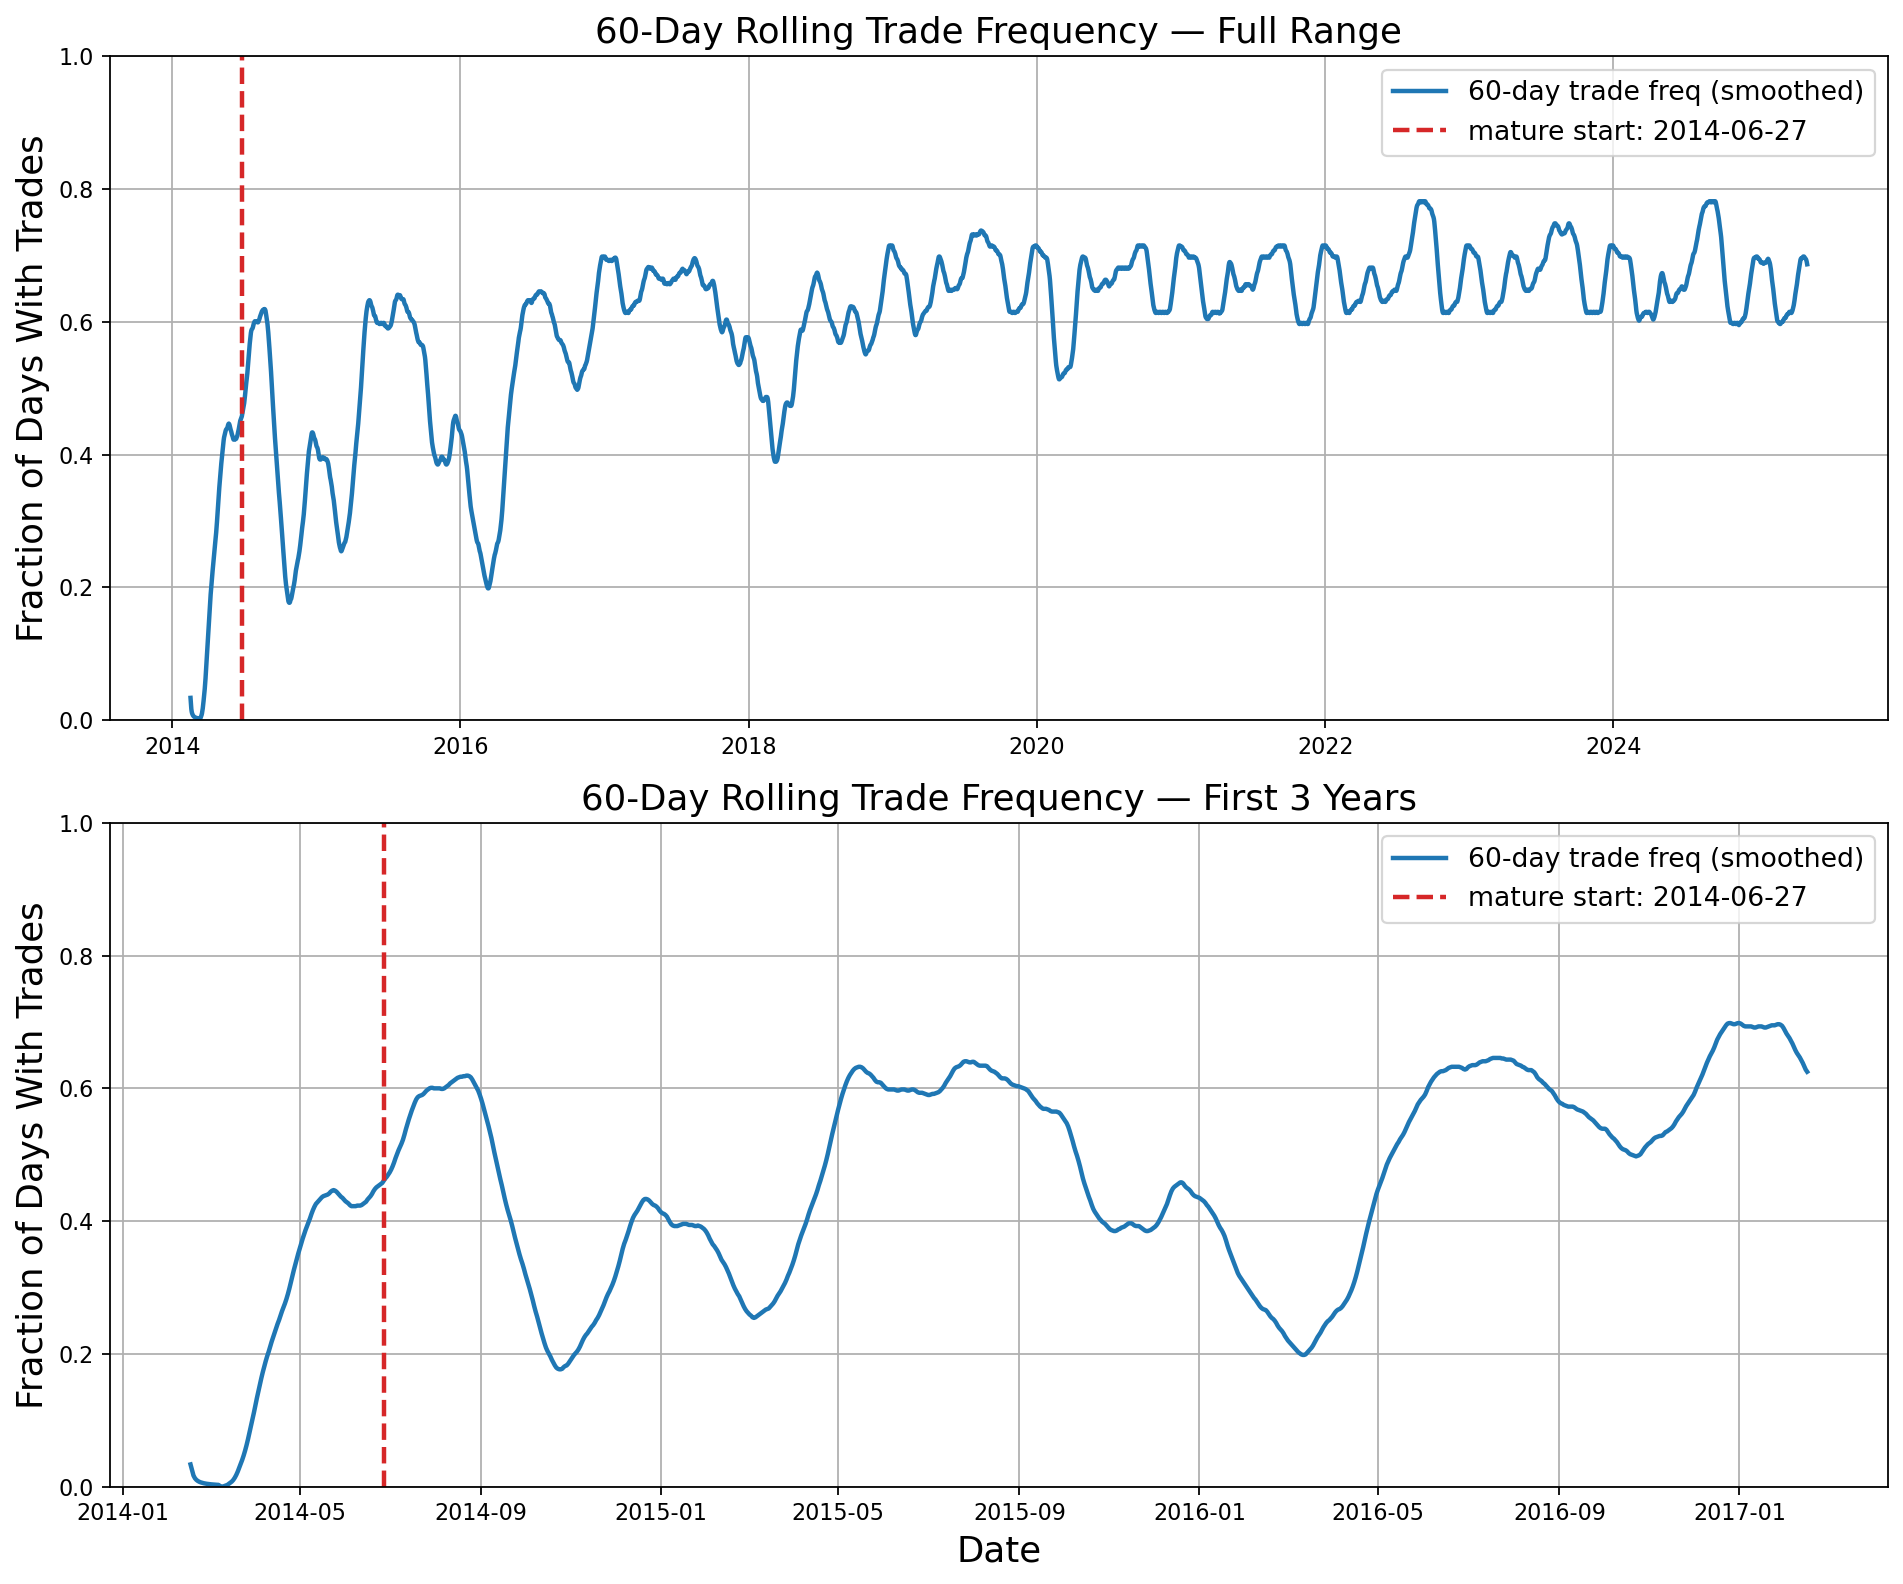

In [13]:
fig, axes = plt.subplots(
    nrows=2, ncols=1, figsize=(12, 10), dpi=160, sharex=False
)

# Top row: full timeline
axes[0].plot(
    rolling60_smth.index,
    rolling60_smth.values,
    lw=2, 
    label="60-day trade freq (smoothed)"
)
axes[0].axvline(
    mature_start,
    color="#d62728",
    ls="--",
    lw=2,
    label=f"mature start: {mature_start.date()}"
)
axes[0].set_title("60-Day Rolling Trade Frequency — Full Range", fontsize=16)
axes[0].set_ylabel("Fraction of Days With Trades", fontsize=16)
axes[0].set_ylim(0, 1)
axes[0].grid(alpha=1)
axes[0].legend(fontsize=12)

# Bottom row: first 3 years
mask = (rolling60_smth.index >= start_date) & (rolling60_smth.index <= end_3y)
axes[1].plot(
    rolling60_smth.index[mask],
    rolling60_smth.values[mask],
    lw=2,
    label="60-day trade freq (smoothed)"
)
axes[1].axvline(
    mature_start,
    color="#d62728",
    ls="--",
    lw=2,
    label=f"mature start: {mature_start.date()}"
)
axes[1].set_title("60-Day Rolling Trade Frequency — First 3 Years", fontsize=16)
axes[1].set_ylabel("Fraction of Days With Trades", fontsize=16)
axes[1].set_xlabel("Date", fontsize=16)
axes[1].set_ylim(0, 1)
axes[1].grid(alpha=1)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()


In [14]:
# Only keep mature phase data
df = df[df.index >= mature_start]
df.head(3)

close  vwap  volume_tons  turnover_cny  cum_turnover_cny
date                                                                
2014-06-27   68.0  68.0          6.0         408.0       34705338.01
2014-06-28    NaN   NaN          NaN           NaN               NaN
2014-06-29    NaN   NaN          NaN           NaN               NaN

In [15]:
# temporary save to parquet
df.to_parquet("../_temp_data_files/01_GDEA_Interim2.parquet")
# restore
df_restored = pd.read_parquet("../_temp_data_files/01_GDEA_Interim2.parquet")
df_restored.head(3)


close  vwap  volume_tons  turnover_cny  cum_turnover_cny
date                                                                
2014-06-27   68.0  68.0          6.0         408.0       34705338.01
2014-06-28    NaN   NaN          NaN           NaN               NaN
2014-06-29    NaN   NaN          NaN           NaN               NaN

### Inspect Missing Values

In [16]:
df_restored.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3967 entries, 2014-06-27 to 2025-05-06
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   close             2419 non-null   float64
 1   vwap              2421 non-null   float64
 2   volume_tons       2421 non-null   float64
 3   turnover_cny      2421 non-null   float64
 4   cum_turnover_cny  3015 non-null   float64
dtypes: float64(5)
memory usage: 186.0 KB


In [17]:
# check if there is any missing or duplicate dates
full_range = pd.date_range(start=df_restored.index.min(), end=df_restored.index.max(), freq="D")
len_full_range = len(full_range)
len_df_restored = len(df_restored)
print(f"Full range: {len_full_range}")
print(f"df_restored: {len_df_restored}")
print(f"Number of missing dates: {len_full_range - len_df_restored}")
print(f"Number of duplicate dates: {df_restored.index.duplicated().sum()}")

Full range: 3967
df_restored: 3967
Number of missing dates: 0
Number of duplicate dates: 0


In [18]:
# Print length of df_restored
print(f"Length of df_restored: {len(df_restored)}")
# Count 0 (non Nan) values in each column
print("Number of 0 values in each column:")
print(df_restored.apply(lambda x: (x == 0).sum()))

# Count NaN values in each column
print("Number of NaN values in each column:")
print(df_restored.apply(lambda x: x.isna().sum()))

Length of df_restored: 3967
Number of 0 values in each column:
close               0
vwap                0
volume_tons         0
turnover_cny        0
cum_turnover_cny    0
dtype: int64
Number of NaN values in each column:
close               1548
vwap                1546
volume_tons         1546
turnover_cny        1546
cum_turnover_cny     952
dtype: int64


In [19]:
# Use exchange_calendars to label trading days
cal = xc.get_calendar("XSHG")
trading_days = cal.sessions_in_range(df_restored.index.min(), df_restored.index.max())

# Drop timezone information
trading_days = trading_days.tz_localize(None)
len_trading_days = len(trading_days)
len_non_trading_days = len_full_range - len_trading_days
print(f"Number of trading days: {len_trading_days}")
print(f"Number of non-trading days: {len_non_trading_days}")

Number of trading days: 2638
Number of non-trading days: 1329


In [20]:
trading_days_plain = set(trading_days.date)

df_restored["is_trading_day"] = np.isin(df_restored.index.date, list(trading_days_plain))
df_restored["is_trading_day"].value_counts()


is_trading_day
True     2638
False    1329
Name: count, dtype: int64

In [21]:
# Make a dataframe for trading/non-trading days
df_trading = df_restored[df_restored["is_trading_day"]]
df_non_trading = df_restored[~df_restored["is_trading_day"]]

#### Inspect Non-trading days

In [22]:
# Print num of misalignment in each column
cols_to_check_non_trading = ['volume_tons']
# Print num of days that are non-trading but have activity in at least one of the columns
num_non_trading_days_with_activity = df_non_trading[cols_to_check_non_trading].notna().any(axis=1).sum()
print(f"Number of non-trading days with activity: {num_non_trading_days_with_activity}")
# Percentage to 4 decimal places
print(f"Percentage of non-trading days with activity: {num_non_trading_days_with_activity / len(df_non_trading) * 100:.4f}%")

Number of non-trading days with activity: 15
Percentage of non-trading days with activity: 1.1287%


#### Inspect Trading days

In [23]:
# count rows that volume_tons is NaNs
num_trading_days_all_nan = df_trading["volume_tons"].isna().sum()
print(f"Number of trading days with all NaN values: {num_trading_days_all_nan}")
# Percentage to 4 decimal places
print(f"Percentage of trading days with all NaN values: {num_trading_days_all_nan / len(df_trading) * 100:.4f}%")

Number of trading days with all NaN values: 232
Percentage of trading days with all NaN values: 8.7945%


#### Plot the inspection results

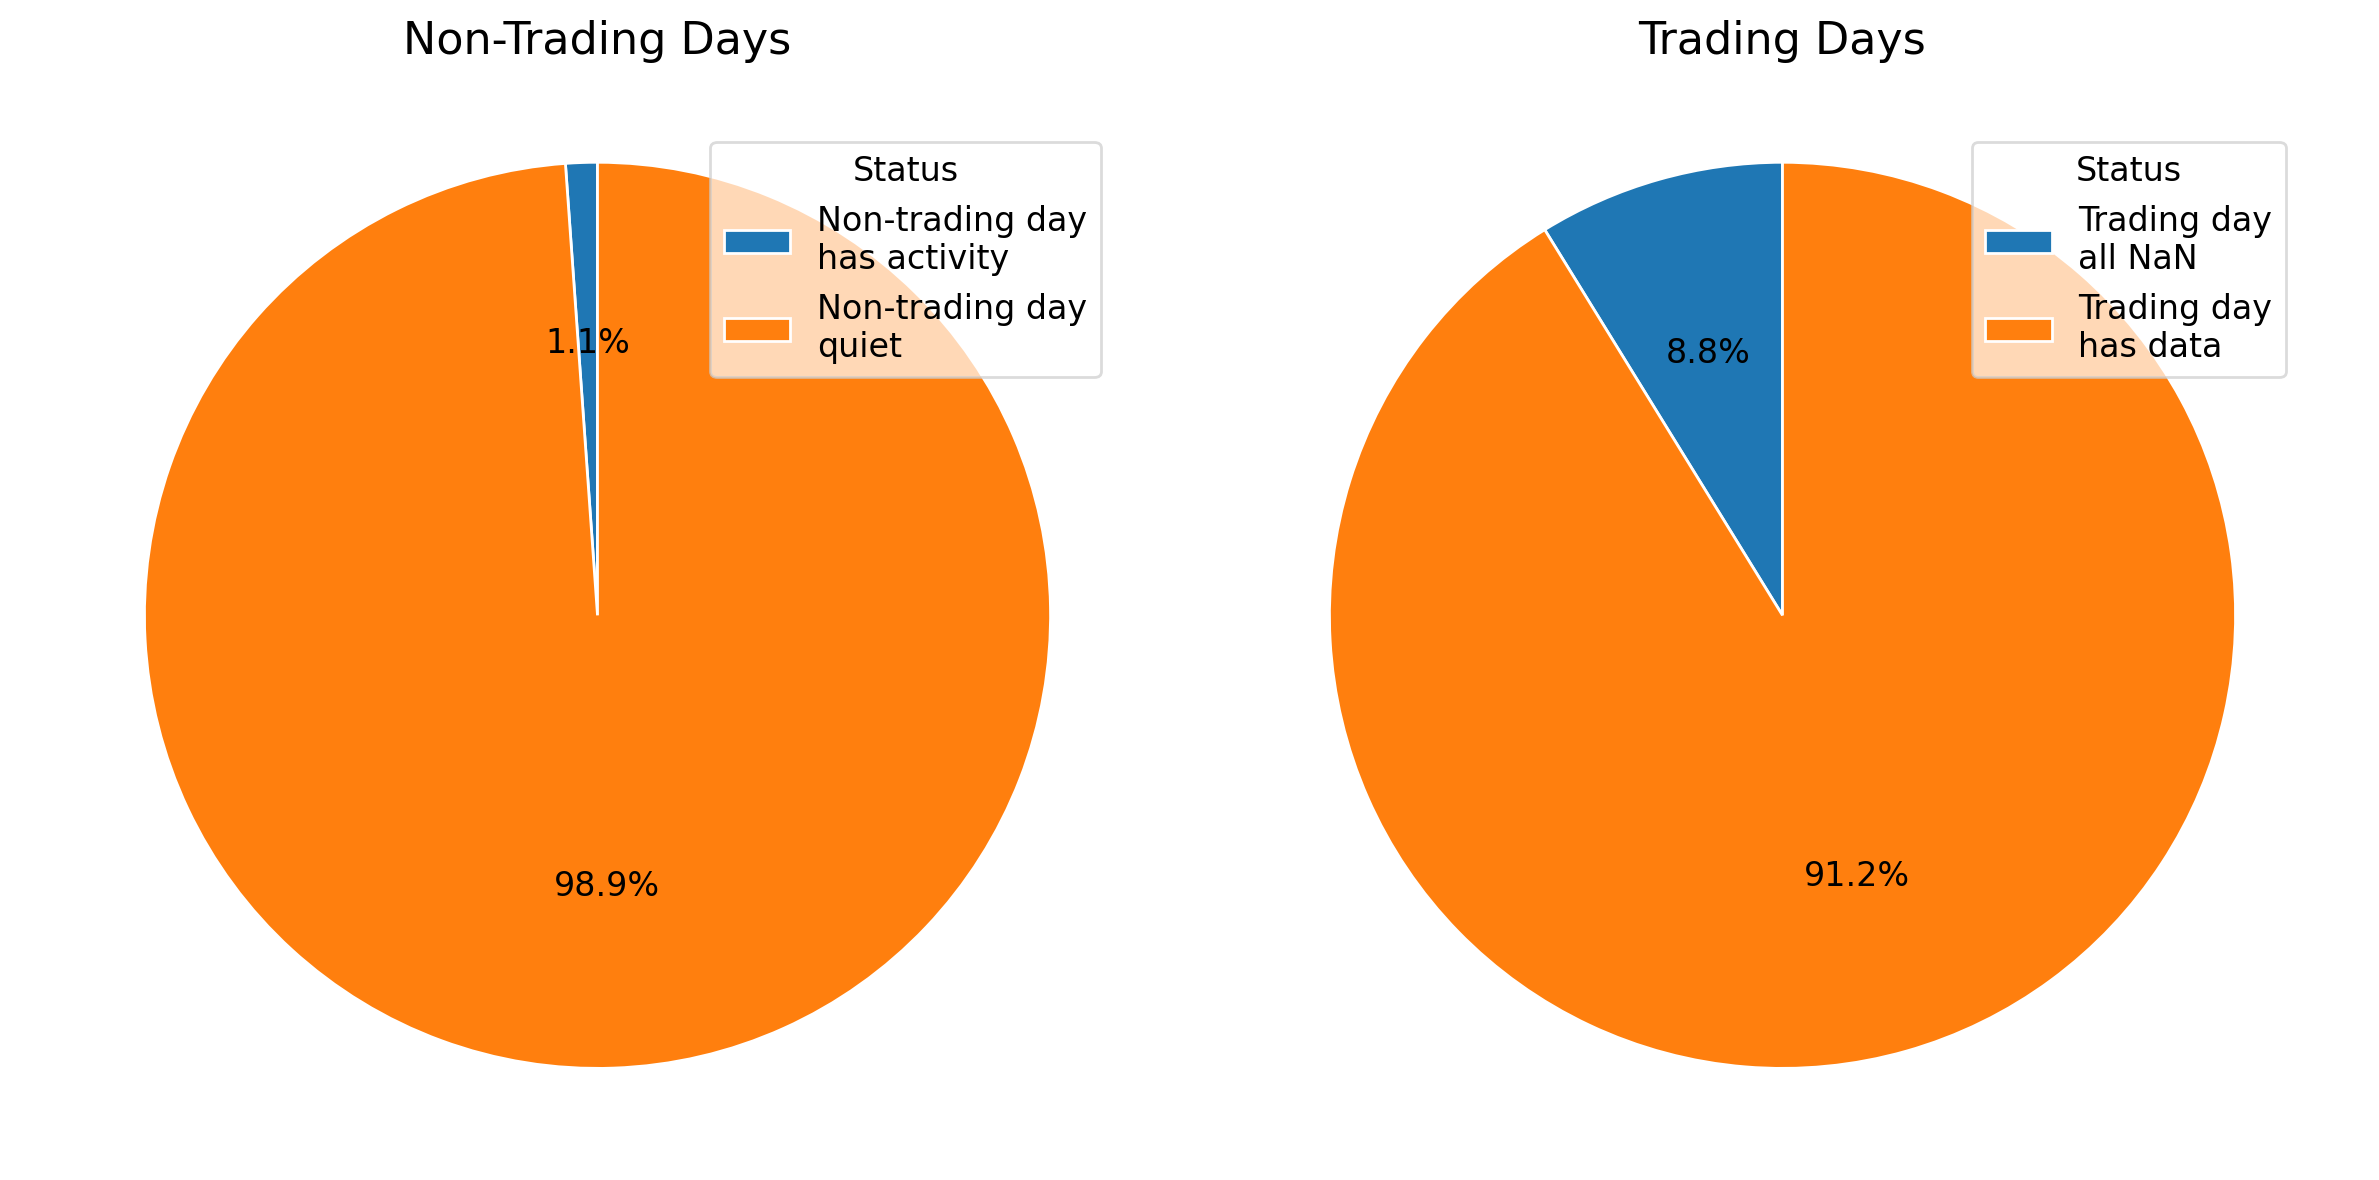

In [24]:
import matplotlib.pyplot as plt

# replace with your actual computed values
sizes_non_trade = [
    num_non_trading_days_with_activity,
    len(df_non_trading) - num_non_trading_days_with_activity
]
sizes_trade = [
    num_trading_days_all_nan,
    len(df_trading) - num_trading_days_all_nan
]
labels_non_trade = ["Non-trading day\nhas activity", "Non-trading day\nquiet"]
labels_trade     = ["Trading day\nall NaN", "Trading day\nhas data"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# Left pie – Non-trading days
wedges_nt, texts_nt, autotxts_nt = axes[0].pie(
    sizes_non_trade,
    startangle=90,
    autopct="%1.1f%%",
    textprops={"fontsize": 12},
    wedgeprops={"edgecolor": "white"}
)
axes[0].axis("equal")
axes[0].set_title("Non-Trading Days", fontsize=16)
axes[0].legend(
    wedges_nt,
    labels_non_trade,
    title="Status",
    title_fontsize=12,
    fontsize=12,
    loc="upper right",
    framealpha=0.7,
    bbox_to_anchor=(0.95, 0.95)
)

# Right pie – Trading days
wedges_t, texts_t, autotxts_t = axes[1].pie(
    sizes_trade,
    startangle=90,
    autopct="%1.1f%%",
    textprops={"fontsize": 12},
    wedgeprops={"edgecolor": "white"}
)
axes[1].axis("equal")
axes[1].set_title("Trading Days", fontsize=16)
axes[1].legend(
    wedges_t,
    labels_trade,
    title="Status",
    title_fontsize=12,
    fontsize=12,
    loc="upper right",
    framealpha=0.7,
    bbox_to_anchor=(0.95, 0.95)
)

plt.tight_layout()
plt.show()


### Fill Missing Values

We assume the calendar are basically correct.
- For non-trading days, there are 16 days with activity.
  - Ignore for now.
- For trading days, there are 230 days with all NaN values.
  - Reguard as open market but no trade.
  
**Missing-Value Imputation Strategy for GDEA Raw Panel**

1. **Generate Flags**
   * `is_open` = calendar day $\in$ XSHG session list.  
   * `is_quiet` = `is_open` & `volume_tons` is NaN. 
   * `has_trade` = `volume_tons.notna()`.

2. **Activity Columns** (`volume_tons`, `turnover_cny`)
   * Fill with $0$

3. **Price Columns** (`close`, `vwap`)
   * Do nothing for now.

4. **Cumulative Turnover** (`cum_turnover_cny`)
   * Forward-fill without limit;

5. **Clean-up**
   * Ensure all numeric columns are `float64`; drop duplicate turnover column.

6. **Persist & Document**
   * Save as `02_GDEA_processed.parquet`.  
   * Save as `02_GDEA_processed.csv`.  
   * Write `README.md` noting calendar assumption, rules above, and row counts for each flag.

#### 1. Generate flags

In [25]:

df_restored["is_open"] = df_restored["is_trading_day"]
df_restored["is_quiet"] = df_restored["is_open"] & df_restored[["volume_tons"]].isna().all(axis=1)
df_restored["has_trade"] = df_restored["volume_tons"].notna()

# Check if the flags are generated correctly
# Num True/False in each flag
print(df_restored["is_open"].value_counts())
print(df_restored["is_quiet"].value_counts())
print(df_restored["has_trade"].value_counts())

is_open
True     2638
False    1329
Name: count, dtype: int64
is_quiet
False    3735
True      232
Name: count, dtype: int64
has_trade
True     2421
False    1546
Name: count, dtype: int64


In [26]:
df_restored.head()

close   vwap  volume_tons  turnover_cny  cum_turnover_cny  \
date                                                                    
2014-06-27  68.00  68.00          6.0        408.00       34705338.01   
2014-06-28    NaN    NaN          NaN           NaN               NaN   
2014-06-29    NaN    NaN          NaN           NaN               NaN   
2014-06-30  62.41  62.41          8.0        499.29       34705837.30   
2014-07-01  58.00  58.00       2776.0     161018.65       34866855.95   

            is_trading_day  is_open  is_quiet  has_trade  
date                                                      
2014-06-27            True     True     False       True  
2014-06-28           False    False     False      False  
2014-06-29           False    False     False      False  
2014-06-30            True     True     False       True  
2014-07-01            True     True     False       True

#### 2. Activity Columns

In [27]:
df_restored.loc[df_restored["volume_tons"].isna(), "volume_tons"] = 0.0
df_restored.loc[df_restored["turnover_cny"].isna(), "turnover_cny"] = 0.0

# Check if all open day volume_tons and turnover_cny are filled
print(f"Unfilled volume_tons: {df_restored[df_restored['is_open'] & df_restored['volume_tons'].isna()].shape[0]}")
print(f"Unfilled turnover_cny: {df_restored[df_restored['is_open'] & df_restored['turnover_cny'].isna()].shape[0]}")

Unfilled volume_tons: 0
Unfilled turnover_cny: 0


#### 3. Price Columns

#### 4. Cumulative Turnover

In [28]:
# Forward-fill cumulative turnover
df_restored["cum_turnover_cny"] = df_restored["cum_turnover_cny"].ffill()

# Check if all cumulative turnover is filled
print(f"Unfilled cumulative turnover: {df_restored[df_restored['is_open'] & df_restored['cum_turnover_cny'].isna()].shape[0]}")

Unfilled cumulative turnover: 0


#### 5. Clean-up

In [29]:
# Drop `is_trading_day`
df_restored = df_restored.drop(columns=["is_trading_day"])
df_restored.head()

close   vwap  volume_tons  turnover_cny  cum_turnover_cny  \
date                                                                    
2014-06-27  68.00  68.00          6.0        408.00       34705338.01   
2014-06-28    NaN    NaN          0.0          0.00       34705338.01   
2014-06-29    NaN    NaN          0.0          0.00       34705338.01   
2014-06-30  62.41  62.41          8.0        499.29       34705837.30   
2014-07-01  58.00  58.00       2776.0     161018.65       34866855.95   

            is_open  is_quiet  has_trade  
date                                      
2014-06-27     True     False       True  
2014-06-28    False     False      False  
2014-06-29    False     False      False  
2014-06-30     True     False       True  
2014-07-01     True     False       True

#### 6. Persist & Document

In [30]:
# Save as processed data to "../../02_Data_Processed/01_Carbon_Markets"
# If does not exist, create the folder
if not os.path.exists("../../../02_Data_Processed/01_Carbon_Markets/01_Regional"):
    os.makedirs("../../../02_Data_Processed/01_Carbon_Markets/01_Regional")
df_restored.to_parquet("../../../02_Data_Processed/01_Carbon_Markets/01_Regional/GDEA_processed.parquet")